# Analysing the Number of Failed Students due to Absents in SU22


## Import csv file and check rows
File is *fpt_failed.csv* </br>
Set the primary key/index to RollNumber of Students </br>
Also sort the list by the Percentage of Absents (>20%)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('fpt_failed.csv')
df = df.sort_values(by=['PercentTotal(%)'])
df.head()
print(df)

    RollNumber                Fullname      GroupName  Absents  \
358   SE130190     Nguyễn Phương Quang         SE1623        7   
359   SE151364          Nguyễn Gia Bảo         SE1618        7   
364   SE130524              Lê Gia Bảo         SE1619        7   
366   SE150329     Nguyễn Hoàng Nguyên         SE1621        7   
98    SE140228      Lê Nguyễn Thế Hùng         SE1740        7   
..         ...                     ...            ...      ...   
363    SE61687         Trần Tiến Thành         SE1618       33   
210   SA130148           Vương Đức Sơn  GD1606_Half 2       30   
209   SE140400           Phạm Tiến Đạt  GD1606_Half 2       30   
215   SA130148           Vương Đức Sơn         GD1501       30   
173   SS171157  Nguyễn Hoàng Minh Tuấn         IB1711       30   

     PercentTotal(%) SubjectCode  
358               21      SWP391  
359               21      SWP391  
364               21      SWP391  
366               21      SWP391  
98                23      PRO192

## Count the number of students based on the absent percentage and plot it

<AxesSubplot:title={'center':'Absentees based on percentage'}, xlabel='PercentTotal(%)', ylabel='Number of students failed by over-absents'>

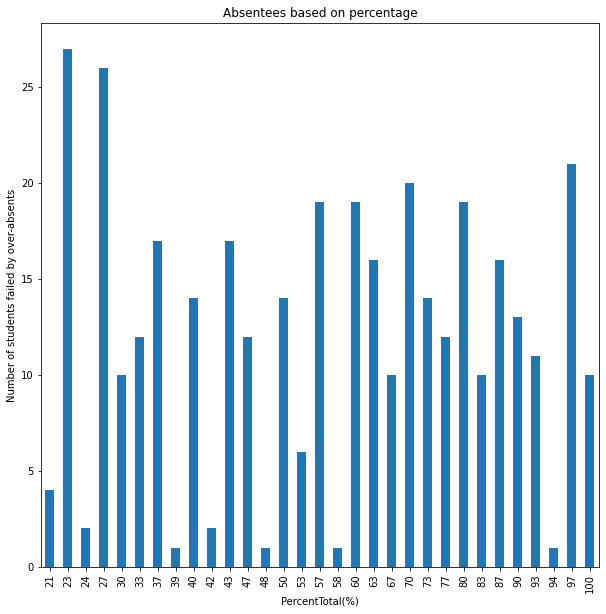

In [4]:
df1 = df.groupby(["PercentTotal(%)"]).size()
df1.plot.bar(x="PercentTotal(%)",
             title="Absentees based on percentage",
             figsize=(10,10),
            ylabel="Number of students failed by over-absents")

Looking at the chart we can see that there isn't much of a trend in terms of the proportion of absence among students. However, if there was to be some noticable observations then it would be that there are less students of around 20 to 40% absent compared to the rest.

## Group by Subject now

In [5]:
df2 = df.groupby(["SubjectCode"])['Fullname'].count().sort_values(ascending=False).reset_index(name="Count")
df2 = df2.set_index("SubjectCode")
print(df2)

             Count
SubjectCode       
OSG202          48
ACC101          41
PRO192          40
MAD101          30
DBI202          30
SSG104          27
PST202          22
DRD204          19
SWP391          19
GDF201          16
NWC204          12
AFA201          11
ECO121          11
MMP201           7
LTG202           6
EAL201           6
ANB401           6
ECB101           5
ENM401           4
DTG121           3
EAW221           3
ANT401           3
DRP101           3
HOM202           2
ENH401           1
CSD203           1
VCM202           1


Let's plot the pie chart to see what subject was "rejected" the most!

<AxesSubplot:title={'center':'Subjects with failed students by absents'}, ylabel='Count'>

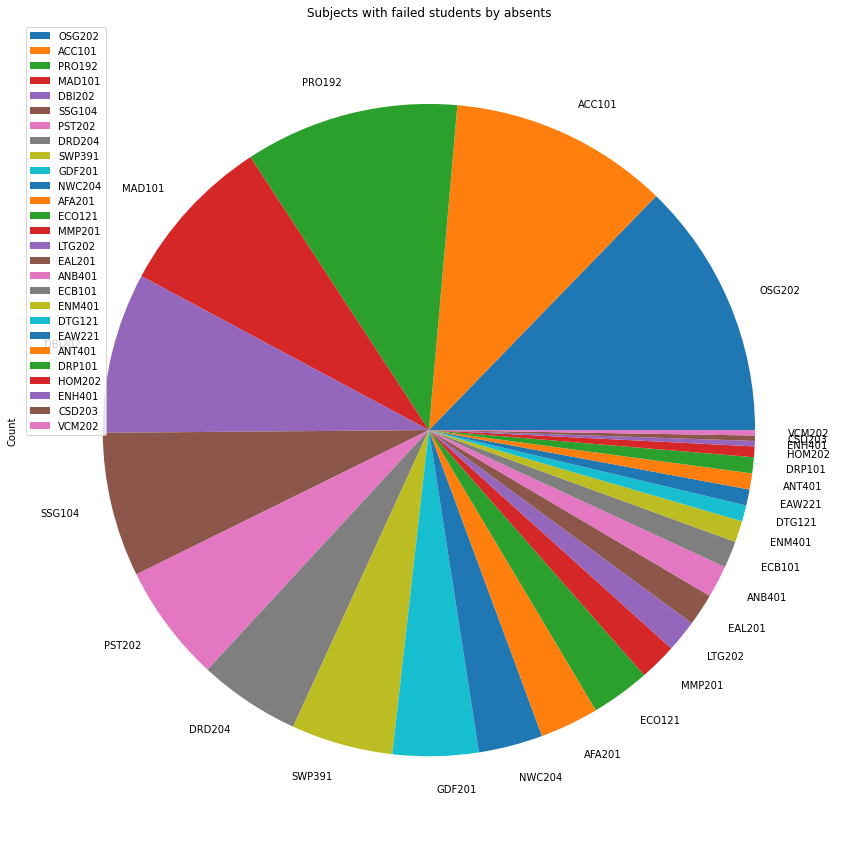

In [6]:
df2.plot.pie(y="Count",
             title="Subjects with failed students by absents",
             figsize = (15,15))

Here, we see that subjects that belong to the "fundamental" categories like OSG202 (Operating System), ACC101 (Introduction to Accounting), PRO192 (Object-Oriented Programming) and DBI202 (Introduction to Database System) witnessed a lot of absents, **jeez idk where the "determination" is when you folks skip class like that smh.**

## Group by RollNumber
Notice that the RollNumber also contains information on the Generation Group i.e.SE17... is K17, SE16... is K16, so let's give it a shot!

In [7]:
rollno = df['RollNumber']
gen = []
for no in rollno:
    if no[2] == "1":
        gen.append(int(no[2:4]))
    else:
        gen.append(int(no[2]))
df['Generation'] = gen
# cleaning it up
print(df[["RollNumber","Fullname","Generation"]])

    RollNumber                Fullname  Generation
358   SE130190     Nguyễn Phương Quang          13
359   SE151364          Nguyễn Gia Bảo          15
364   SE130524              Lê Gia Bảo          13
366   SE150329     Nguyễn Hoàng Nguyên          15
98    SE140228      Lê Nguyễn Thế Hùng          14
..         ...                     ...         ...
363    SE61687         Trần Tiến Thành           6
210   SA130148           Vương Đức Sơn          13
209   SE140400           Phạm Tiến Đạt          14
215   SA130148           Vương Đức Sơn          13
173   SS171157  Nguyễn Hoàng Minh Tuấn          17

[377 rows x 3 columns]


Now let's create a... (okay so we already have bar chart, pie chart..) That's right, a Line chart!

   Generation  Count
0           6      6
1          13     15
2          14     60
3          15     77
4          16    120
5          17     99


<AxesSubplot:title={'center':'Absents by generation'}, xlabel='Generation', ylabel='Number of failed students due to absents'>

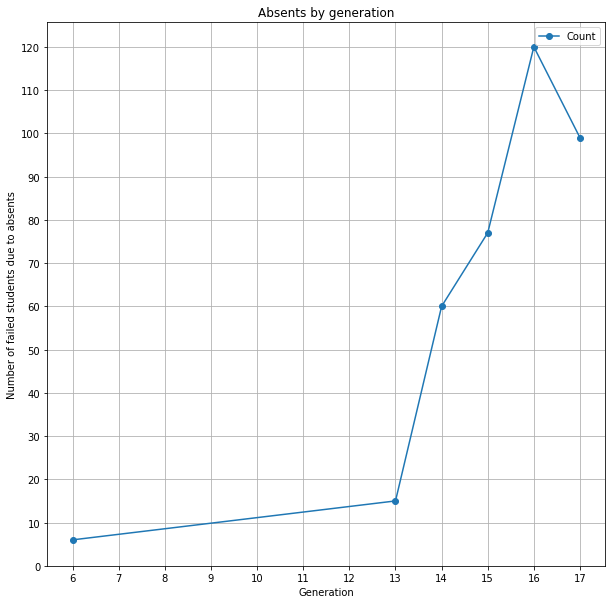

In [8]:
df3 = df.groupby(["Generation"])['Fullname'].count().reset_index(name="Count")
count = df3['Count']
print(df3)
df3.plot.line(x="Generation", # choose the x-axis
              title='Absents by generation', # set title
              ylabel='Number of failed students due to absents', # Give it a label
              xticks = list(range(min(gen), max(gen) + 1, 1)), # adjust the interval of x-axis
              yticks = list(range(0, max(count) + 1, 10)), # adjust the interval of y-axis
              grid = True, # enable grid
              style='o-',
              figsize = (10,10) # resizing the plot
             )

Woah! The later generations (K13 and so forth) tend to take more absents, huh? These guys *sighs

## But wait... There's one more thing!
So we have data on the generations of absentees and their respective number of failed students as both numeric values, right? So technically we have a 2-dimensional numeric data, which, if you study statistics / ML "deep" enough, you're probably wondering about the relationship between these 2 forms of data. So.. that takes us to **scatter plot**.

So let's create a scatter plot first.

<AxesSubplot:xlabel='Generation', ylabel='Count'>

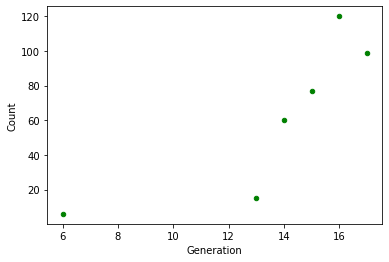

In [12]:
df3.plot.scatter(x= "Generation", y= "Count", c="Green")

Here's the final challenge? Can we make a **linear regression** out of it? Let's try!

6 17 9.541935483870958 -65.98279569892455
The equation line is: y = 9.5x-66.0
And the correlation coefficient is:  [[1.        0.8275781]
 [0.8275781 1.       ]]


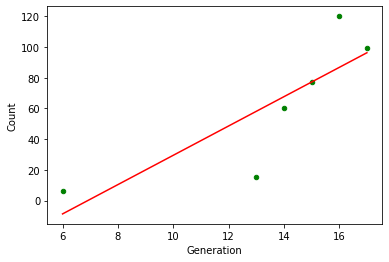

In [23]:
import matplotlib.pyplot as plt
m, i = np.polyfit(df3["Generation"], df3["Count"],1)
a, b = min(df3["Generation"]), max(df3["Generation"])
print(a,b,m,i)
df3.plot.scatter(x= "Generation", y= "Count", c="Green")
plt.plot([a, b],[m*a+i, m*b+i], color="Red")

In [25]:
matrix = np.corrcoef(df3["Generation"], df3["Count"])
print(f"The equation line is: y = {round(m,1)}x{round(i,1)}")
print("Correlation coefficient is: ", matrix[0][1], ", which is well within acceptable to not be rejected as a linear model!")

The equation line is: y = 9.5x-66.0
Correlation coefficient is:  0.8275781006976607 , which is well within acceptable to not be rejected as a linear model!


**RED FLAG** though, the sample size is not large enough so the linear regression model doesn't really say much about the relationship between generation and absents per se, or put it simply, there just is not strong enough evidence. Guess everything would be more fun if data is a little more abundant but oh well... We gonna work with all the data we have got. But to conclude, there is a linear relationship between generations and absents and assuming the model is correct, later generations like K18,... will be even lazier to come to class than their predecessors.

## That's all for now! Thank you so much for sticking by! Hope you a great day.

Author: Đinh Ngọc Ân (Andy Dinh) / FPTU HCM.